In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Try some new data
# https://github.com/mwaskom/seaborn-data
df = sns.load_dataset('tips')
df['size'] = df['size'].astype('category')

df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [8]:
pvt = df.pivot_table(index='smoker', values='total_bill', aggfunc='sum').reset_index()
pvt

,smoker,total_bill
0,Yes,1930.34
1,No,2897.43


<AxesSubplot:xlabel='smoker', ylabel='total_bill'>

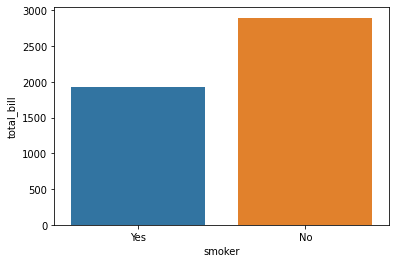

In [12]:
sns.barplot(x='smoker', y='total_bill', data=pvt)

In [19]:
pvt = df.pivot_table(index='day', columns='smoker', values='total_bill',
                    aggfunc='count')
pvt

smoker,Yes,No
day,,
Thur,17,45
Fri,15,4
Sat,42,45
Sun,19,57


<AxesSubplot:xlabel='day', ylabel='count'>

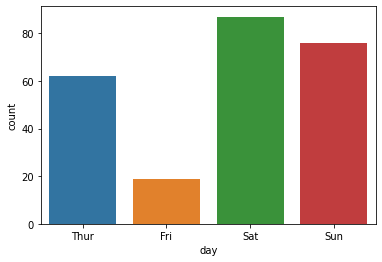

In [22]:
sns.countplot(x=df.day,)

Text(0.5, 1.0, 'Zone - Day')

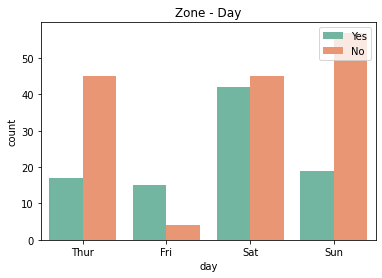

In [29]:
sns.countplot(x=df.day, hue=df.smoker, palette='Set2')
plt.legend(loc='upper right')
plt.title('Zone - Day')

<AxesSubplot:xlabel='total_bill', ylabel='count'>

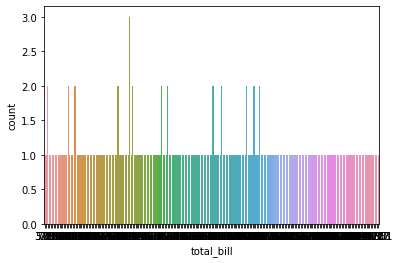

In [30]:
sns.countplot(x='total_bill', data=df) # No use

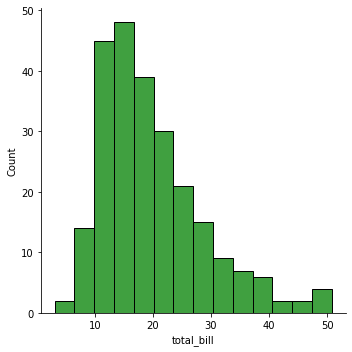

In [40]:
sns.displot(data=df, x='total_bill', color='g')

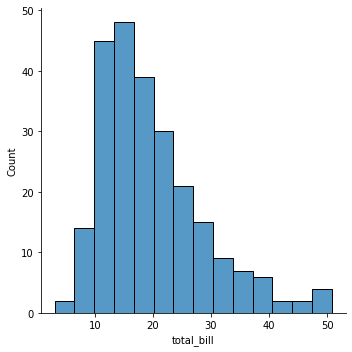

In [37]:
sns.displot(df['total_bill'])

<AxesSubplot:xlabel='total_bill', ylabel='Count'>

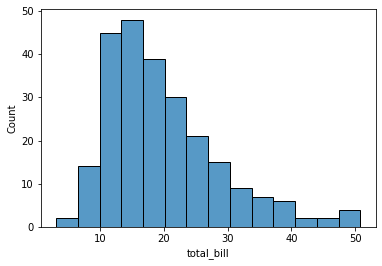

In [39]:
sns.histplot(data=df.total_bill)

<AxesSubplot:>

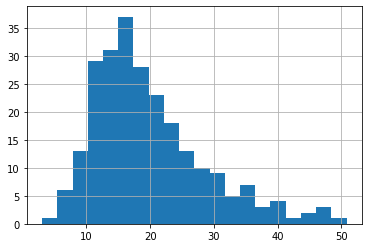

In [44]:
 df.total_bill.hist(bins=20)

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

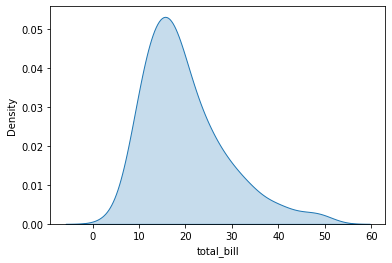

In [46]:
sns.kdeplot(df.total_bill, shade=True)

<AxesSubplot:xlabel='total_bill'>

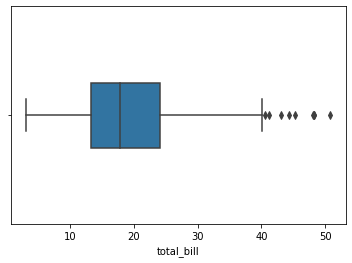

In [48]:
sns.boxplot(data=df, x='total_bill', width=.3)

In [56]:
pvt = df.pivot_table(index='time', values='total_bill', aggfunc='mean')\
    .sort_values(by='time', ascending=False)
# defalut func = mean
pvt

,total_bill
time,
Dinner,20.797159
Lunch,17.168676


array([<AxesSubplot:title={'center':'Lunch'}>,
       <AxesSubplot:title={'center':'Dinner'}>], dtype=object)

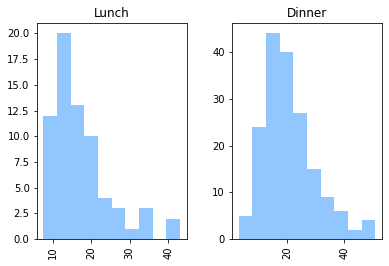

In [63]:
plt.style.use('seaborn-pastel')
df.hist('total_bill', by='time', bins=10)

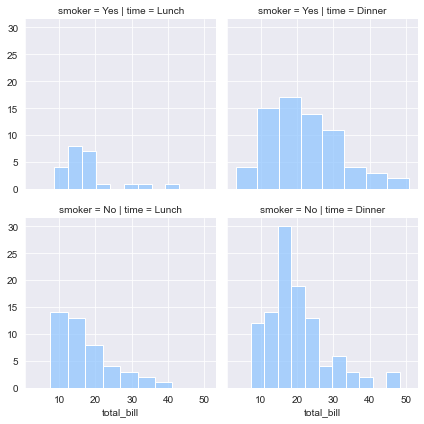

In [70]:
sns.set_style('darkgrid')
grid = sns.FacetGrid(df, row='smoker', col='time') # 2x2 dimension
# smoker => Yes, No
# time => Lunch, Dinner
# grid.map(plt.hist, 'total_bill', bins=10)
grid.map(sns.histplot, 'total_bill', kde=False)

<AxesSubplot:xlabel='time', ylabel='total_bill'>

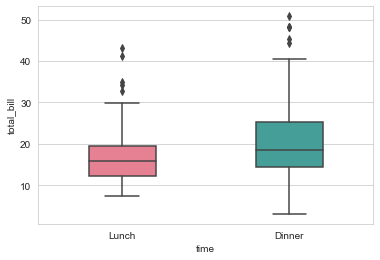

In [82]:
sns.set_style('whitegrid')
# x should be distcont, y should be cont
sns.boxplot(x='time', y='total_bill', data=df, width=0.4, palette='husl')

<AxesSubplot:xlabel='time', ylabel='total_bill'>

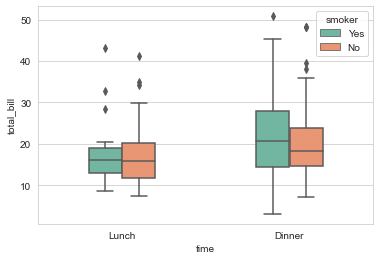

In [86]:
sns.boxplot(x=df.time, y=df.total_bill, width=0.4, palette='Set2',
           hue=df.smoker)
# Smoker & Dinner has someone that are willing to pay on very amount.

In [88]:
df.groupby(['time']).total_bill.quantile([.25, .5, .75]).to_frame()

total_bill
time                   
Lunch  0.25     12.2350
       0.50     15.9650
       0.75     19.5325
Dinner 0.25     14.4375
       0.50     18.3900
       0.75     25.2825

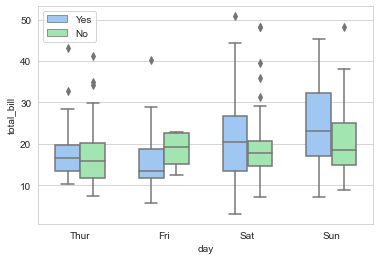

In [91]:
sns.boxplot(x=df.day, y=df.total_bill, width=0.6, hue=df.smoker)
plt.legend(loc='upper left')

In [113]:
pvt = df.pivot_table(index='day', values='total_bill', aggfunc=['sum'],
        columns='smoker').sort_values(by=['day'], ascending=False)
pvt

sum         
smoker     Yes       No
day                    
Sun     458.28  1168.88
Sat     893.62   884.78
Fri     252.20    73.68
Thur    326.24   770.09

<AxesSubplot:xlabel='day'>

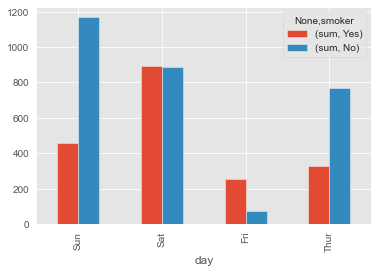

In [114]:
plt.style.use('ggplot')
pvt.plot.bar()

In [115]:
pvt = df.pivot_table(index='day', values='total_bill', aggfunc=['sum','count'], # also see count func
        columns='smoker').sort_values(by=['day'], ascending=False)
pvt

sum          count    
smoker     Yes       No   Yes  No
day                              
Sun     458.28  1168.88    19  57
Sat     893.62   884.78    42  45
Fri     252.20    73.68    15   4
Thur    326.24   770.09    17  45